# Comparison between Python Default Processing & Multiprocessing
## Akif Islam
## 07 August 2023

# Simple Processing

In [86]:
number_in_range = 10000

import multiprocessing as mp
import time
import math


results_a = []
results_b = []
results_c = []

def make_calculation_one(numbers):
    for number in numbers:
        results_a.append(math.sqrt(number**3))

def make_calculation_two(numbers):
    for number in numbers:
        results_b.append(math.sqrt(number**4))

def make_calculation_three(numbers):
    for number in numbers:
        results_c.append(math.sqrt(number**5))

# Multiprocessing

In [22]:
import multiprocessing as mp
import time
import math


results_a = []
results_b = []
results_c = []

def make_calculation_one(numbers):
    for number in numbers:
        results_a.append(math.sqrt(number**3))

def make_calculation_two(numbers):
    for number in numbers:
        results_b.append(math.sqrt(number**4))

def make_calculation_three(numbers):
    for number in numbers:
        results_c.append(math.sqrt(number**5))



if __name__=='__main__':

  required_time_in_simple = []
  required_time_in_multi = []
  applied_range = []

  i = 1

  for _ in range (1000):
    i*=2;
    if(i>(2**24)):
      break

    applied_range.append(i)
    number_list=list(range(i))

    # Simple Threading
    start = time.time()
    make_calculation_one(number_list)
    make_calculation_two(number_list)
    make_calculation_three(number_list)

    end = time.time()

    turnaround_simple = round(end-start,2)
    required_time_in_simple.append(turnaround_simple)

    print(f"Required time in Simple for {i} : ",turnaround_simple)

    # Multi Processing
    p1 = mp.Process(target=make_calculation_one, args=(number_list,))
    p2 = mp.Process(target=make_calculation_two, args=(number_list,))
    p3 = mp.Process(target=make_calculation_two, args=(number_list,))

    start = time.time()
    p1.start()
    p2.start()
    p3.start()
    end = time.time()

    turnaround_multi=round(end-start,2)
    required_time_in_multi.append(turnaround_multi)

    print(f"Required time in Multi for {i}: ",turnaround_multi)






Required time in Simple for 2 :  0.0
Required time in Multi for 2:  0.05
Required time in Simple for 4 :  0.0
Required time in Multi for 4:  0.06
Required time in Simple for 8 :  0.0
Required time in Multi for 8:  0.15
Required time in Simple for 16 :  0.0
Required time in Multi for 16:  0.06
Required time in Simple for 32 :  0.0
Required time in Multi for 32:  0.04
Required time in Simple for 64 :  0.0
Required time in Multi for 64:  0.05
Required time in Simple for 128 :  0.0
Required time in Multi for 128:  0.04
Required time in Simple for 256 :  0.0
Required time in Multi for 256:  0.04
Required time in Simple for 512 :  0.0
Required time in Multi for 512:  0.06
Required time in Simple for 1024 :  0.0
Required time in Multi for 1024:  0.05
Required time in Simple for 2048 :  0.0
Required time in Multi for 2048:  0.04
Required time in Simple for 4096 :  0.01
Required time in Multi for 4096:  0.04
Required time in Simple for 8192 :  0.02
Required time in Multi for 8192:  0.04
Require

# Comparison of Default Processing & Multiprocessing

In [23]:
applied_range

[2,
 4,
 8,
 16,
 32,
 64,
 128,
 256,
 512,
 1024,
 2048,
 4096,
 8192,
 16384,
 32768,
 65536,
 131072,
 262144,
 524288,
 1048576,
 2097152,
 4194304,
 8388608,
 16777216]

In [24]:
required_time_in_simple

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.02,
 0.04,
 0.09,
 0.15,
 0.32,
 0.64,
 1.25,
 2.59,
 6.38,
 11.4,
 21.85,
 45.37]

In [25]:
required_time_in_multi

[0.05,
 0.06,
 0.15,
 0.06,
 0.04,
 0.05,
 0.04,
 0.04,
 0.06,
 0.05,
 0.04,
 0.04,
 0.04,
 0.05,
 0.04,
 0.04,
 0.05,
 0.07,
 0.05,
 0.06,
 0.11,
 0.12,
 0.3,
 0.35]

In [39]:
len(applied_range)

24

# Plot without Multiprocessing

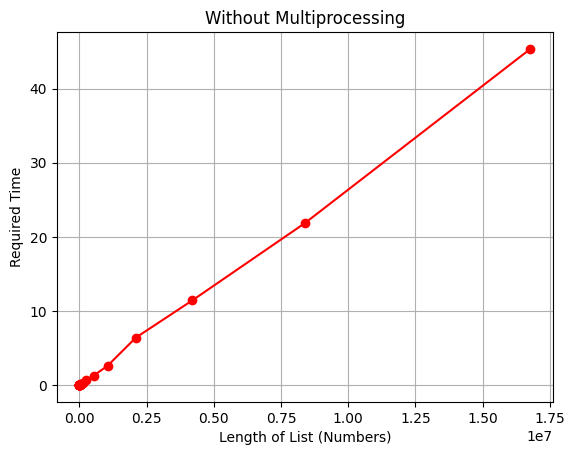

In [41]:
from matplotlib import markers
import matplotlib.pyplot as plt
plt.plot(applied_range,required_time_in_simple,color='red',marker='o')
plt.grid(visible=True)
plt.xlabel('Length of List (Numbers)')
plt.ylabel('Required Time')
plt.title('Without Multiprocessing')
plt.show()


# Plot with Multiprocessing

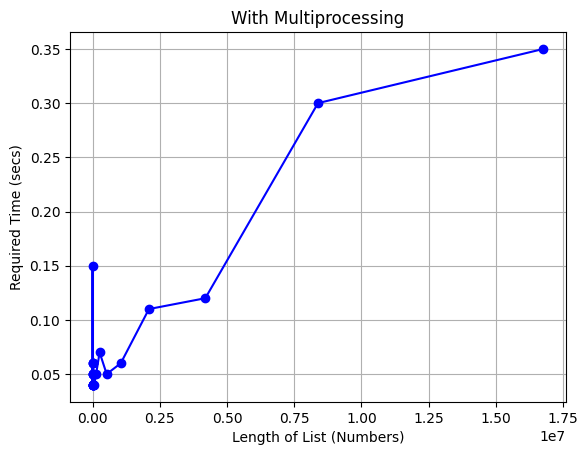

In [40]:
plt.plot(applied_range,required_time_in_multi,color='blue',marker='o')
plt.grid(visible=True)
plt.xlabel('Length of List (Numbers)')
plt.ylabel('Required Time (secs)')
plt.title('With Multiprocessing')
plt.show()

# Combined Plot

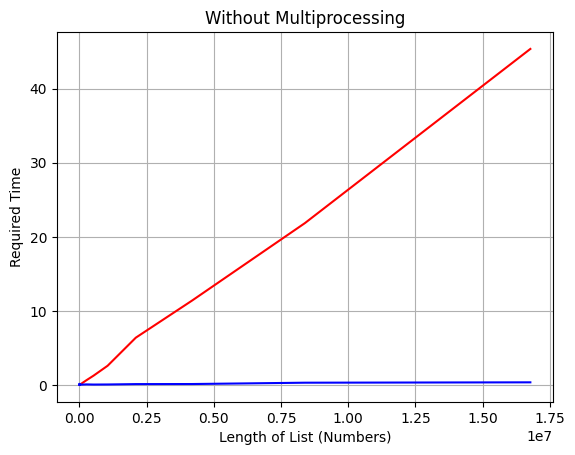

In [85]:
end_boundary = 24

from matplotlib import markers
import matplotlib.pyplot as plt


plt.plot(applied_range[0:end_boundary],required_time_in_simple[0:end_boundary],color='red')
plt.plot(applied_range[0:end_boundary],required_time_in_multi[0:end_boundary],color='blue')
plt.grid(visible=True)

plt.xlabel('Length of List (Numbers)')
plt.ylabel('Required Time')
plt.title('Without Multiprocessing')
plt.show()


# Conclusion

- Multiprocessing is very very faster for higher numbers of elements. Its 128x faster for 2^23 elements